In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
Download_root = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
Housing_path = 'datasets/housing'
Housing_url=Download_root+Housing_path+'/housing.csv'

In [3]:
def fetch_housing_data(housing_url=Housing_url,housing_path=Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(Housing_path)
    tgz_path=os.path.join(housing_path,'housing.csv')
    urllib.request.urlretrieve(housing_url,tgz_path)
    

In [4]:
fetch_housing_data(Housing_url,Housing_path)

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=Housing_path):
    csv_path = os.path.join(housing_path,'housing.csv')
    print(csv_path)
    return pd.read_csv(csv_path)

In [7]:
housing_data = load_housing_data()

datasets/housing/housing.csv


In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing_data['total_bedrooms'].isnull().sum()

207

In [10]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

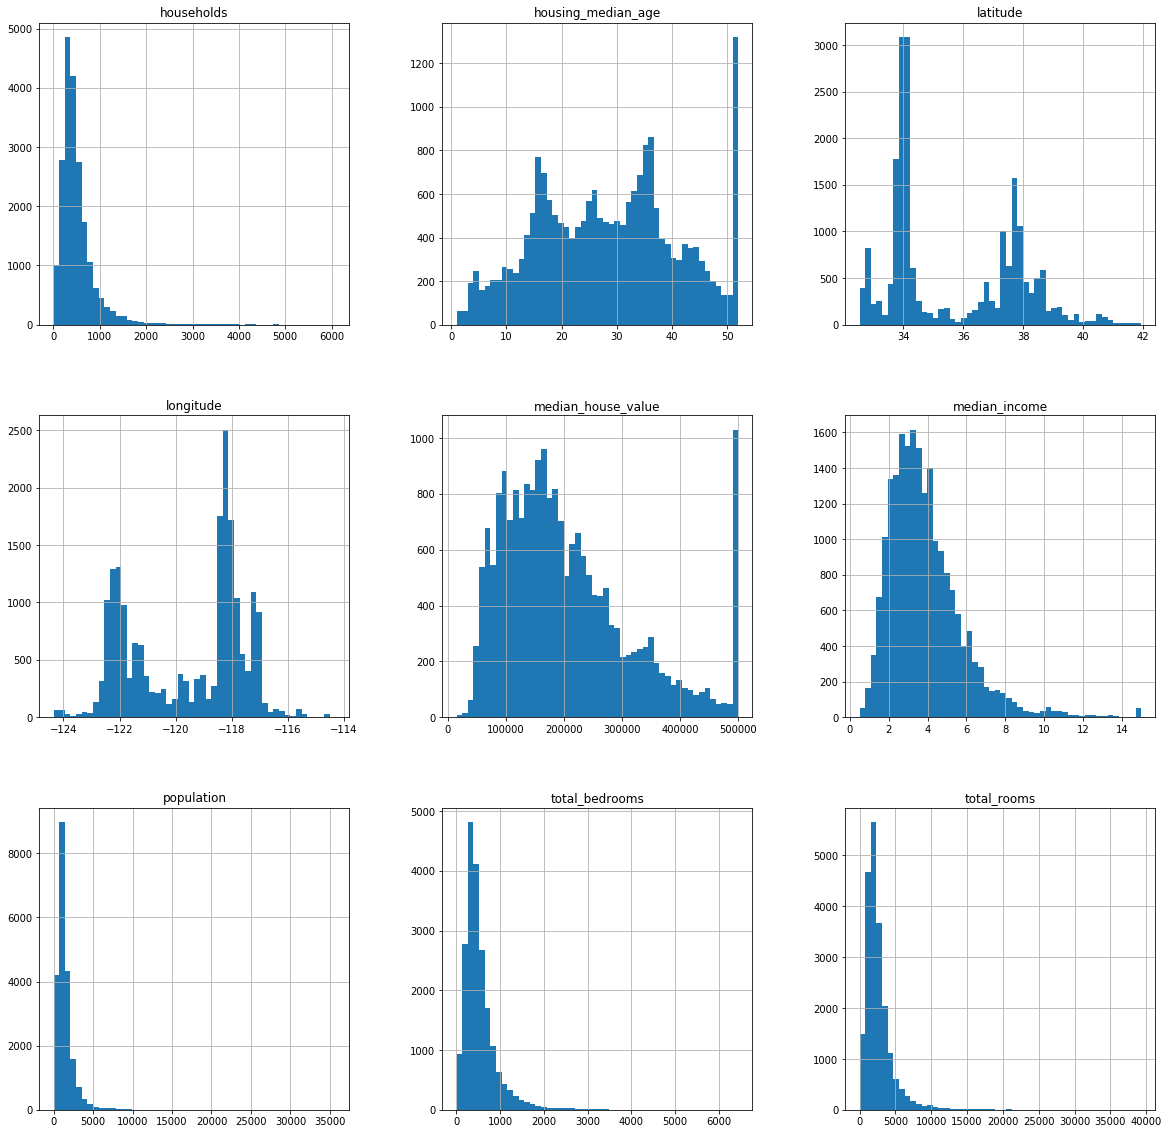

In [12]:
housing_data.hist(bins=50,figsize=(20,20))
plt.show()

In [13]:
import numpy as np

In [14]:
def split_train_test(data,test_ration):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ration)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set,test_set = split_train_test(housing_data,0.2)

In [16]:
import hashlib
def test_set_check(identifier,test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio
def split_train_test_by_id(data,test_ratio,id_column,hash=hashlib.md5):
    ids=data[id_column]
    in_test_set=ids.apply(lambda ids:test_set_check(ids,test_ratio,hash))
    print(in_test_set)
    return data.loc[~in_test_set],data.loc[in_test_set]

In [17]:
housing_data['id'] = housing_data["longitude"]*1000+housing_data['latitude']

In [18]:
train,test = split_train_test_by_id(housing_data,0.2,"id")

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8         True
9        False
10        True
11        True
12        True
13        True
14        True
15        True
16       False
17       False
18        True
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
20610    False
20611     True
20612    False
20613     True
20614    False
20615    False
20616     True
20617     True
20618     True
20619    False
20620     True
20621    False
20622    False
20623     True
20624    False
20625    False
20626    False
20627    False
20628     True
20629    False
20630    False
20631    False
20632    False
20633     True
20634    False
20635    False
20636     True
20637    False
20638    False
20639    False
Name: id, Length: 20640, dtype: bool


In [19]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122212.16


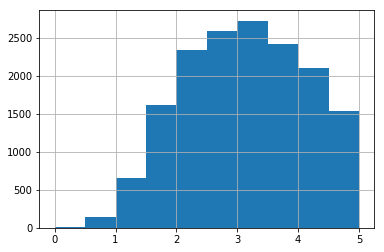

In [20]:
housing_data['median_income'].hist(bins=10,range=(0,5))

In [21]:
housing_data['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
5        4.0368
6        3.6591
7        3.1200
8        2.0804
9        3.6912
10       3.2031
11       3.2705
12       3.0750
13       2.6736
14       1.9167
15       2.1250
16       2.7750
17       2.1202
18       1.9911
19       2.6033
20       1.3578
21       1.7135
22       1.7250
23       2.1806
24       2.6000
25       2.4038
26       2.4597
27       1.8080
28       1.6424
29       1.6875
          ...  
20610    1.3631
20611    1.2857
20612    1.4934
20613    1.4958
20614    2.4695
20615    2.3598
20616    2.0469
20617    3.3021
20618    2.2500
20619    2.7303
20620    4.5625
20621    2.3661
20622    2.4167
20623    2.8235
20624    3.0739
20625    4.1250
20626    2.1667
20627    3.0000
20628    2.5952
20629    2.0943
20630    3.5673
20631    3.5179
20632    3.1250
20633    2.5495
20634    3.7125
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Len

In [22]:
housing_data['income_cat']=np.ceil(housing_data['median_income']/1.5)

In [23]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122212.16,3.0


In [24]:
housing_data['income_cat'].where(housing_data['income_cat']<5,5.0,inplace=True)

In [25]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-122212.15,3.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-122212.16,3.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-122212.16,3.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16,2.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-122212.16,3.0


In [26]:
from sklearn.model_selection import StratifiedShuffleSplit

In [27]:
split  = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing_data,housing_data['income_cat']):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set=housing_data.loc[test_index]

In [28]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [29]:
(0.039826-0.040213)/0.039826

-0.009717270125043902

In [30]:
test_data = strat_test_set.copy()

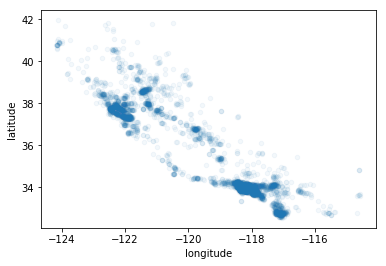

In [31]:
test_data.plot(kind='scatter',x='longitude',y='latitude',alpha=0.05)

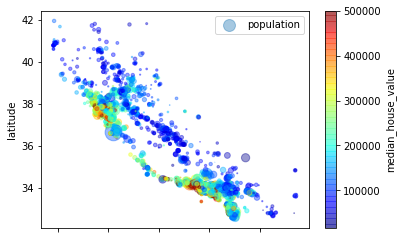

In [32]:
test_data.plot(kind="scatter",x='longitude',y='latitude',alpha=0.4,s=test_data['population']/100,label="population",
               c='median_house_value',cmap=plt.get_cmap('jet'))


In [33]:
import seaborn as sns

In [34]:
corr = test_data.corr()

In [35]:
cmap = sns.diverging_palette(230, 10, n=9)

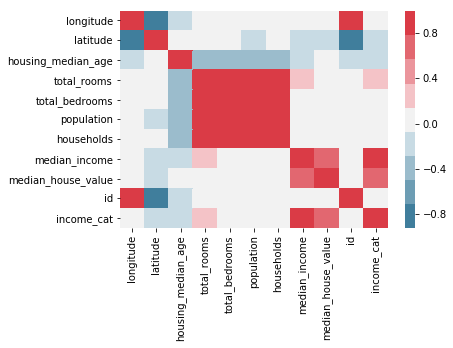

In [36]:
sns.heatmap(corr,cmap=cmap)

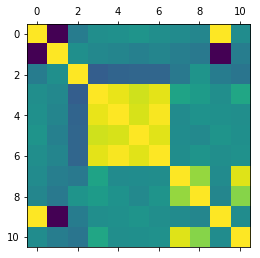

In [37]:
plt.matshow(test_data.corr())

In [38]:
from pandas.tools.plotting import scatter_matrix

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118f11160>,
      dtype=object)

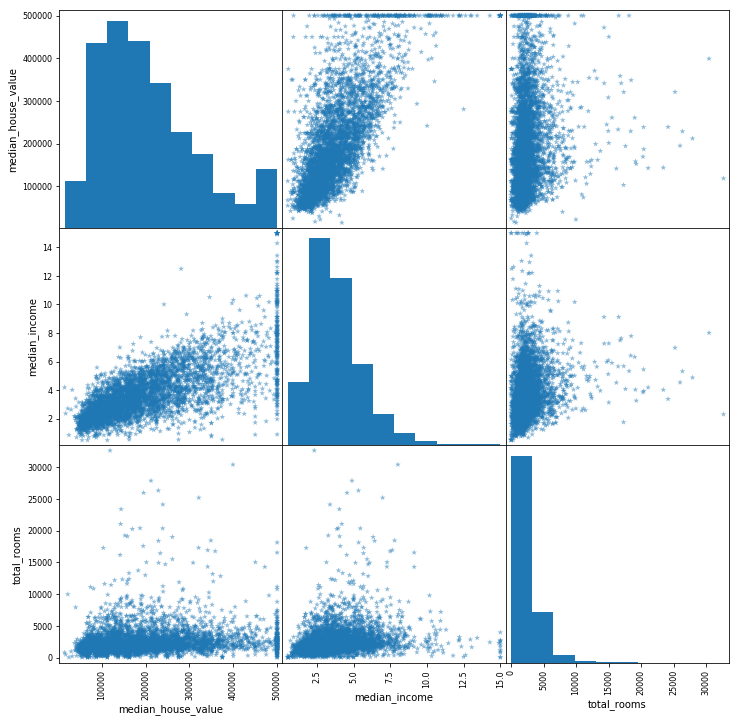

In [39]:
scatter_matrix(test_data[['median_house_value','median_income','total_rooms']],figsize=(12,12),marker='*')

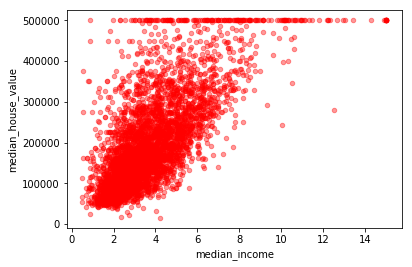

In [40]:
test_data.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.4,color='red')

In [41]:
train_data = test_data.copy()

In [42]:
train_data = train_data.drop(['id','income_cat'],axis=1)

In [43]:
train_data_num = train_data.drop(['ocean_proximity'],axis=1)

In [44]:
from sklearn.preprocessing import Imputer

In [45]:
imputer=Imputer(strategy='median')

In [46]:
imputer.fit(train_data_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [47]:
imputer.statistics_

array([-1.18455e+02,  3.42200e+01,  2.80000e+01,  2.15850e+03,
        4.41000e+02,  1.17200e+03,  4.16000e+02,  3.51475e+00,
        1.81300e+05])

In [48]:
X=imputer.transform(train_data_num)

In [49]:
train_data_num = pd.DataFrame(train_data_num)

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [51]:
train_cat = train_data['ocean_proximity']

In [52]:
train_cat_ecoded = encoder.fit_transform(train_cat)

In [53]:
train_cat_ecoded

array([0, 0, 0, ..., 0, 1, 1])

In [54]:
np.unique(train_cat_ecoded)

array([0, 1, 2, 3, 4])

In [55]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot=encoder.fit_transform(train_cat_ecoded.reshape(-1,1))
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [56]:
train_cat_ecoded

array([0, 0, 0, ..., 0, 1, 1])

In [57]:
train_cat_ecoded.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [58]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [59]:
from sys import getsizeof

In [60]:
getsizeof(housing_cat_1hot)

56

In [61]:
getsizeof(housing_cat_1hot.toarray())

165232

In [62]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot=encoder.fit_transform(train_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [63]:
from sklearn.base import BaseEstimator,TransformerMixin

In [64]:
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

In [65]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [66]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_data.values)

In [67]:
housing_extra_attribs.shape

(20640, 14)

In [130]:
housing_labels = strat_train_set['median_house_value']
housing=strat_train_set.drop('median_house_value',axis=1)

In [131]:
num_attribs = list(housing)
num_attribs.remove('ocean_proximity')
cat_attribs = ['ocean_proximity']

In [132]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names =  attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values
class CustomLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self,sparse_output=False):
        self.sparse_output=sparse_output
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        enc=LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)

In [133]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [134]:
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())    
])
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',CustomLabelBinarizer())
])
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [136]:
housing_prepared = full_pipeline.fit_transform(housing)

# Train the model use linear regression

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepare=full_pipeline.fit_transform(housing.iloc[:2000])

In [140]:
print(some_data_prepare.shape)

(2000, 17)


In [141]:
print(lin_reg.predict(housing_prepared[0:5]))

[203659.1875 326729.5    204240.      58612.125  194168.8125]


In [142]:
housing_labels.iloc[:5]

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64

In [143]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_predictions,housing_labels)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68375.35383839767

(0, 500000)

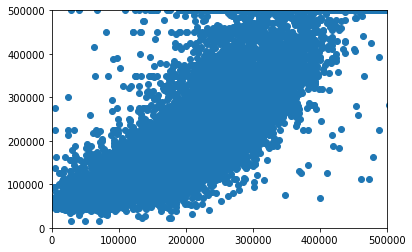

In [152]:
plt.scatter(housing_predictions,housing_labels)
plt.xlim(0, 500000)
plt.ylim(0, 500000)

# predict on test data

In [144]:
x_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [145]:
test_data_prepared = full_pipeline.fit_transform(x_test)

In [146]:
test_predict = lin_reg.predict(test_data_prepared)

In [147]:
lin_mse_test = mean_squared_error(test_predict,y_test)

In [148]:
lin_rmse_test = np.sqrt(lin_mse_test)

In [149]:
lin_rmse_test

182356459014.9921

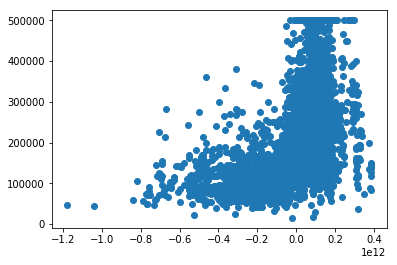

In [154]:
plt.scatter(test_predict,y_test)

In [81]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [82]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

# use cross-validation

In [83]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [84]:
def display_scores(scores):
    print('scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())

In [85]:
display_scores(rmse_scores)

scores: [78479.9858915  74169.34408811 75374.15753918 74024.76358808
 74944.90109108 73763.33144536 75841.10892482 76945.12267952
 79936.44186726 76850.287854  ]
Mean: 76032.94449689155
Standard deviation: 1924.500001372247


choose a few promising models before fine tune for hyperparameter. 

Grid Search to do fine tune

In [155]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid=[{'n_estimators':[3,10,30,100,200,300],'max_features':[2,4,6,8],},
            {'bootstrap':[False],'n_estimators':[3,10,30,100],'max_features':[2,3,4],}
           ]

In [156]:
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,
                         param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30, 100, 200, 300], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10, 30, 100], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [159]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 100}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [90]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

69041.57446410014 {'max_features': 2, 'n_estimators': 3}
59459.25071599838 {'max_features': 2, 'n_estimators': 10}
57125.79229634268 {'max_features': 2, 'n_estimators': 30}
64443.44790505242 {'max_features': 4, 'n_estimators': 3}
56710.98411252828 {'max_features': 4, 'n_estimators': 10}
54333.10422226097 {'max_features': 4, 'n_estimators': 30}
63613.39765021354 {'max_features': 6, 'n_estimators': 3}
55756.176745738514 {'max_features': 6, 'n_estimators': 10}
53444.95760946065 {'max_features': 6, 'n_estimators': 30}
63810.95665299531 {'max_features': 8, 'n_estimators': 3}
56161.98886500313 {'max_features': 8, 'n_estimators': 10}
53906.42003716876 {'max_features': 8, 'n_estimators': 30}
67161.16369101942 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
57729.74120536007 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
63885.997002599484 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
55399.51811677638 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

analyze the model: produce the relative importance of each attribute

In [91]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.05945215, 0.05445166, 0.04049559, 0.01776277, 0.01901902,
       0.0197372 , 0.01888214, 0.35162678, 0.07671407, 0.10286502,
       0.07413819, 0.00843385, 0.14800319, 0.00085741, 0.00214252,
       0.00541845])

In [157]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,-121852.71,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,-121892.95,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,-117167.23,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,-119573.69,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,-118555.77,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,INLAND,-120932.34,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,<1H OCEAN,-118465.96,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,INLAND,-117205.85,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,<1H OCEAN,-118226.01,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN,-118245.98,1.0


In [92]:
extra_attribs = ['rooms_per_hhould','pop_per_hhold','bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)

In [93]:
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [94]:
attributes = num_attribs+extra_attribs+cat_one_hot_attribs

sorted(zip(feature_importances,attributes),reverse=True)

# Evaluate the model on test set

In [95]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [96]:
x_test_prepared = full_pipeline.transform(x_test)

In [97]:
final_predictions = final_model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [98]:
final_rmse

38326.82916912206

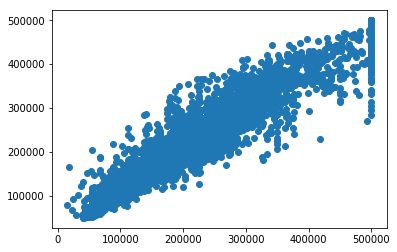

In [108]:
plt.scatter(y_test,final_predictions)

# Exerise1 try SVM

In [163]:
from sklearn.svm import SVR

In [164]:
svm_reg = SVR()

In [165]:
svm_reg.get_params

<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>

In [166]:
para_grid = [{'C':[0.001,0.1],'kernel':['linear','rbf'],'gamma':[0.001,0.1]}]

In [103]:
grid_search=GridSearchCV(svm_reg,para_grid,cv=5,scoring='neg_mean_squared_error',verbose=1,n_jobs=4)
grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   19.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'C': [0.001, 0.1], 'kernel': ['linear', 'rbf'], 'gamma': [0.001, 0.1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [104]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [105]:
para = grid_search.cv_results_

In [167]:
svm_reg.fit(housing_prepared,housing_labels)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [170]:
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse=mean_squared_error(housing_predictions,housing_labels)
svm_rmse=np.sqrt(svm_mse)

In [173]:
svm_rmse

118487.95709414658

In [172]:
test_predict = svm_reg.predict(test_data_prepared)
svm_mse_test=mean_squared_error(test_predict,y_test)
svm_rmse_test = np.sqrt(svm_mse_test)

In [174]:
svm_rmse_test

116827.73121444356

(0, 500000)

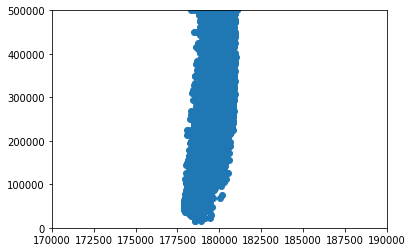

In [177]:
plt.scatter(housing_predictions,housing_labels)
plt.xlim(170000, 190000)
plt.ylim(0, 500000)